In [3]:
import sys
import os
sys.path.append(os.path.abspath("../src"))
import cubeit.DMs as dms
import imp
import cubeit.notebook_functions as nbf
imp.reload(nbf)
import numpy as np
import matplotlib.pyplot as plt
from cubeit.gates_DMs import (
    had, s, t, x, y, z, # simple single-qubit gates
    phase, rotation_x, rotation_y, rotation_z, # parameterised single-qubit gates
    cnot, cnot_10, swap, cz, # two-qubit gates
)

# Example notebook showing how to use the density matrix classes contained within the cube<sup>it</sup> package

### We can first prepare a state in $|00\rangle$
The density matrix, $\rho$, is then calculated through $\rho = |00\rangle \langle00|$.

In [ ]:
state = np.array([1.,0.,0.,0.], dtype=complex)
rho_00 = np.outer(state,state)
rho_00

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

### Cube<sup>it</sup> contains a class for two-qubit density matrices, called `DensityMatrix2Qubit`. <br>
Here, we convert the density matrix, $\rho = |00\rangle \langle00|$, into a `DensityMatrix2Qubit` object.

In [14]:
rho = dms.DensityMatrix2Qubit(rho_00)
print(rho)

DensityMatrix2Qubit(
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]
)


### We can apply quantum logic gates to our state using the `apply_single_qubit_state` method <br>
Apply a Hadamard (_had_) gate to target qubit 0.

In [15]:
rho.apply_single_qubit_gate(h(), 0)

print(rho)

DensityMatrix2Qubit(
[[0.5+0.j 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]]
)


## The density matrix class also supports circuits containing a sequence of quantum gates, targetted on specific qubits.

Try out multi gate circuits by providing a list of gates along with the corresponding targets.<br>
Note that for two-qubit gates (CNOT, CZ etc.) a tuple of targets must be provided.

In [ ]:
gates = [h(),
         s(),
         t(),
         rotation_x(np.pi/4),
         cnot()]

targets = [0,
           0,
           0,
           0,
           (0,1)]

In [ ]:
rho_multi = dms.DensityMatrix2Qubit(rho_00) # Create a fresh density matrix object
rho_multi.apply_sequence(gates, targets) # Apply the sequence of gates
rho_multi # Display the final density matrix

DensityMatrix2Qubit(
[[ 0.75      +0.j    0.        +0.j   -0.35355339-0.25j  0.        +0.j  ]
 [ 0.        +0.j    0.        +0.j    0.        +0.j    0.        +0.j  ]
 [-0.35355339+0.25j  0.        +0.j    0.25      +0.j    0.        +0.j  ]
 [ 0.        +0.j    0.        +0.j    0.        +0.j    0.        +0.j  ]]
)

## If desired, the qubits can be prepared in another initial state <br>

For example, the qubits could be prepared in the Bell state
#### $|\Phi^+ \rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$

In [ ]:
state_bell = 1/np.sqrt(2) * np.array([1,0,0,1]) # Prepare Bell state vector

rho_bell = np.outer(state_bell,state_bell) # Calculate density matrix
bell = dms.DensityMatrix2Qubit(rho_bell) # Create DensityMatrix2Qubit object
bell

DensityMatrix2Qubit(
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]
)

### Apply the same sequence of gates to the bell state

In [22]:
bell.apply_sequence(gates,targets)
bell

DensityMatrix2Qubit(
[[ 0.375    +6.93889390e-18j  0.1767767+1.25000000e-01j
  -0.1767767-1.25000000e-01j  0.125    +3.53553391e-01j]
 [ 0.1767767-1.25000000e-01j  0.125    -6.93889390e-18j
  -0.125    -6.93889390e-18j  0.1767767+1.25000000e-01j]
 [-0.1767767+1.25000000e-01j -0.125    +6.93889390e-18j
   0.125    +6.93889390e-18j -0.1767767-1.25000000e-01j]
 [ 0.125    -3.53553391e-01j  0.1767767-1.25000000e-01j
  -0.1767767+1.25000000e-01j  0.375    -6.93889390e-18j]]
)

### The class contains a method which cleans floating-point precision error and allows for easier visualisation of density matrices.

In [34]:
bell.clean()
bell

DensityMatrix2Qubit(
[[ 0.375    +0.j          0.1767767+0.125j      -0.1767767-0.125j
   0.125    +0.35355339j]
 [ 0.1767767-0.125j       0.125    +0.j         -0.125    +0.j
   0.1767767+0.125j     ]
 [-0.1767767+0.125j      -0.125    +0.j          0.125    +0.j
  -0.1767767-0.125j     ]
 [ 0.125    -0.35355339j  0.1767767-0.125j      -0.1767767+0.125j
   0.375    +0.j        ]]
)

## The cube<sup>it</sup> package also provides the capability to incorporate noise channels into the circuit. <br>

### cube<sup>it</sup> contains four valid noise channels:

- Depolarising noise  
- Bit flip noise  
- Dephasing noise  
- Amplitude damping noise  

The format to specify noise channels is through a dictionary containing the noise channels with their corresponding probability.

In [ ]:
noise_channels = {
    'depolarising': 0.02,
    'bit flip': 0.02,
    'dephasing': 0.02,
    'amplitude damping': 0.02,
    }

### The density matrix can again be evolved through a sequence of gates, but this time noise will be applied. <br>

We will prepare the $|\Phi^+\rangle$ Bell state again, so that we can compare the outcome to the noiseless circuit.

In [40]:
bell_noise = dms.DensityMatrix2Qubit(rho_bell) # Create a fresh density matrix object

bell_noise.apply_sequence_noise(gates, targets, noise_channels=noise_channels) # Apply the sequence of gates with noise

bell_noise

DensityMatrix2Qubit(
[[ 0.3629901 +0.00000000e+00j  0.15979213+1.12990100e-01j
   0.1129901 +3.19584263e-01j -0.15979213-1.12990100e-01j]
 [ 0.15979213-1.12990100e-01j  0.1370099 +0.00000000e+00j
   0.15979213+1.12990100e-01j -0.1129901 +6.66411371e-18j]
 [ 0.1129901 -3.19584263e-01j  0.15979213-1.12990100e-01j
   0.3629901 +0.00000000e+00j -0.15979213+1.12990100e-01j]
 [-0.15979213+1.12990100e-01j -0.1129901 -1.33282274e-17j
  -0.15979213-1.12990100e-01j  0.1370099 +0.00000000e+00j]]
)

Now if we compare the result with the noiseless outcome, the influence of noise in the circuit can be seen.

In [42]:
print("The noiseless outcome is:", bell)
print("The noisy outcome is:", bell_noise)

The noiseless outcome is: DensityMatrix2Qubit(
[[ 0.375    +0.j          0.1767767+0.125j      -0.1767767-0.125j
   0.125    +0.35355339j]
 [ 0.1767767-0.125j       0.125    +0.j         -0.125    +0.j
   0.1767767+0.125j     ]
 [-0.1767767+0.125j      -0.125    +0.j          0.125    +0.j
  -0.1767767-0.125j     ]
 [ 0.125    -0.35355339j  0.1767767-0.125j      -0.1767767+0.125j
   0.375    +0.j        ]]
)
The noisy outcome is: DensityMatrix2Qubit(
[[ 0.3629901 +0.00000000e+00j  0.15979213+1.12990100e-01j
   0.1129901 +3.19584263e-01j -0.15979213-1.12990100e-01j]
 [ 0.15979213-1.12990100e-01j  0.1370099 +0.00000000e+00j
   0.15979213+1.12990100e-01j -0.1129901 +6.66411371e-18j]
 [ 0.1129901 -3.19584263e-01j  0.15979213-1.12990100e-01j
   0.3629901 +0.00000000e+00j -0.15979213+1.12990100e-01j]
 [-0.15979213+1.12990100e-01j -0.1129901 -1.33282274e-17j
  -0.15979213-1.12990100e-01j  0.1370099 +0.00000000e+00j]]
)


## Measurement of quantum systems is probabilistic. 

### The system can be in a superposition of every possible state, but we can only measure one at a time. So, we measure the system repeatedly, with a finite number of shots, in order to build measurement statistics.

### Cube<sup>it</sup> contains the capability to model this measurement, and compare it to the ideal results that could be obtained in the theoretical limit of an infinite number of measurement shots.

First, specify a range of measurement shots to simulate

In [45]:
shots = [50, 100, 500, 1000] # specify a number of measurement shots

Perform measurements of the evolved Bell state with specified shots.

In [ ]:
measurements_bell, bell_ideal = bell.measure_shots(shots)
print(bell_ideal, measurements_bell)

{'00': 0.37499999999999983, '01': 0.12499999999999994, '10': 0.12499999999999994, '11': 0.37499999999999983} [{'00': 0.42, '01': 0.16, '10': 0.16, '11': 0.26}, {'00': 0.2, '01': 0.24, '10': 0.17, '11': 0.39}, {'00': 0.366, '01': 0.13, '10': 0.154, '11': 0.35}, {'00': 0.355, '01': 0.138, '10': 0.151, '11': 0.356}]


Perform measurements of the noisily evolved Bell state with specified shots.

In [ ]:
measurements_noise, noise_ideal = bell_noise.measure_shots(shots)

(Or use the custom function for plotting comparisons!)

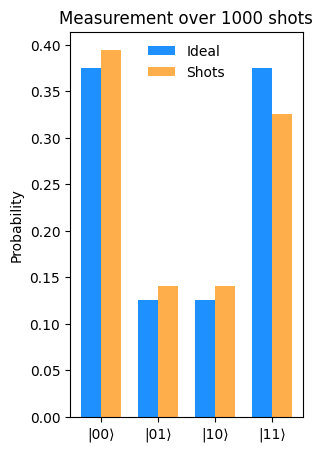

In [98]:
figure = nbf.plot_measure_DMs(bell, meas_shots=1000)